## Snehal Sawant

## Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
s_data.shape

(25, 2)

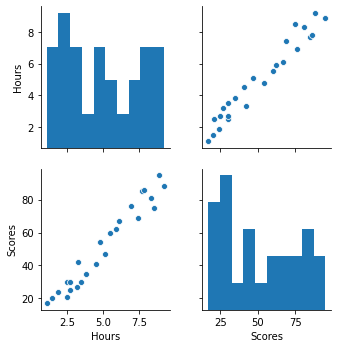

In [7]:
sns.pairplot(s_data) # plot pairplot for all numeric variables. 
plt.show()

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

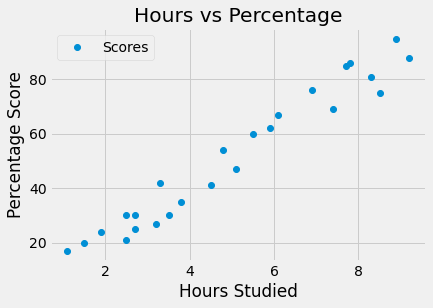

In [8]:
# Plotting the distribution of scores
plt.style.use('fivethirtyeight')
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<b>From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. i.e if the number of hours increases then the percentage of score also increases.

# Preparing the data

In this step we divide the data into two sets , one is inputs(attributes) and outputs(labels).

In [9]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

# Splitting of data

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


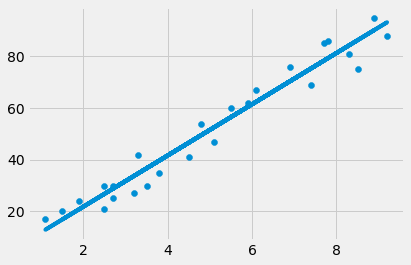

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions


Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
y_pred_train=regressor.predict(X_train)
y_pred_train

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [14]:
print(X_test) # Testing data - In Hours
y_pred_test=regressor.predict(X_test)
print(y_pred_test ) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


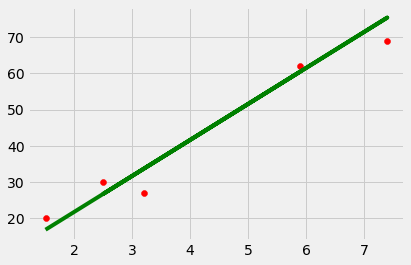

In [15]:
# plot the straight line for test data
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred_test,color='green')
plt.show()

# Check intercept,coefficient and interpret:

In [16]:
print( regressor.coef_)
print( regressor.intercept_)


[9.91065648]
2.0181600414346974


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  

df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Comparision between Actual VS Predicted 

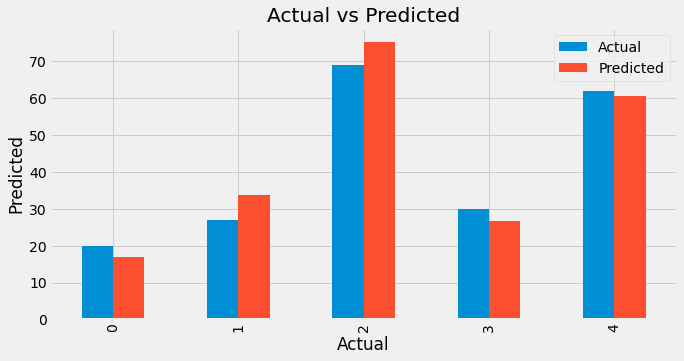

In [18]:
df_1=df.head(25)
df_1.plot(kind='bar',figsize=(10,5))
plt
plt.title('Actual vs Predicted')  
plt.xlabel('Actual')  
plt.ylabel('Predicted') 
plt.plot()
plt.show()

In [19]:
# You can also test with your own data
hours = [[9.25]]
prediction_score = regressor.predict(hours)
print("Predicted Score of student studying 9.25 hours= {}".format(prediction_score[0]))

Predicted Score of student studying 9.25 hours= 93.69173248737535


<b>From above result,if a student studied dor 9.25 hours then he/she will obtain score 93%.

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
r_sq= metrics.r2_score(y_test, y_pred_test)
print('R2 score is {}'.format(r_sq))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R2 score is 0.9454906892105355


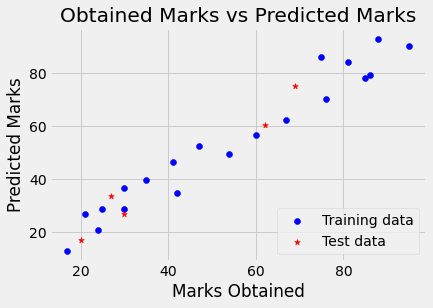

In [21]:
plt.scatter(y_train, y_pred_train, c='blue', marker = 'o', label='Training data')
plt.scatter(y_test, y_pred_test, c='red', marker = '*', label='Test data')
plt.xlabel('Marks Obtained')
plt.ylabel('Predicted Marks')
plt.title('Obtained Marks vs Predicted Marks')
plt.legend(loc = 'lower right')
plt.plot()
plt.show()